In [1]:
import pandas as pd
from textblob import TextBlob

# Load the CSV file
file_path = 'Lonely.csv'
data = pd.read_csv(file_path)

print(data.head())

   lonely               I am feeling lonely
0  lonely                  I am feeling sad
1  lonely                   No one loves me
2  lonely  I wish I could talk with someone
3  lonely  I feel so isolated from everyone
4  lonely               I hate being myself


In [2]:
# Check the column names in your DataFrame
print(data.columns)

Index(['lonely', 'I am feeling lonely'], dtype='object')


In [3]:
# Assign column names
data.columns = ['lonely', 'feelings']

In [4]:
print(data.columns)

Index(['lonely', 'feelings'], dtype='object')


In [5]:
# Analyze sentiment for each sentence
data['Sentiment_Polarity'] = data['feelings'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['Sentiment_Subjectivity'] = data['feelings'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Display the dataframe with sentiments
print(data)

        lonely                          feelings  Sentiment_Polarity  \
0       lonely                  I am feeling sad           -0.500000   
1       lonely                   No one loves me            0.000000   
2       lonely  I wish I could talk with someone            0.000000   
3       lonely  I feel so isolated from everyone            0.000000   
4       lonely               I hate being myself           -0.800000   
..         ...                               ...                 ...   
61  not lonely                      I am awesome            1.000000   
62  not lonely  My family is always there for me            0.000000   
63  not lonely   I can't wait to meet new people            0.136364   
64  not lonely          I am positive about life            0.227273   
65  not lonely      Today feels like a good day             0.700000   

    Sentiment_Subjectivity  
0                 1.000000  
1                 0.000000  
2                 0.000000  
3                 0

<ipython-input-9-f1962c1d0131>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data['Sentiment_Polarity'], palette='coolwarm')


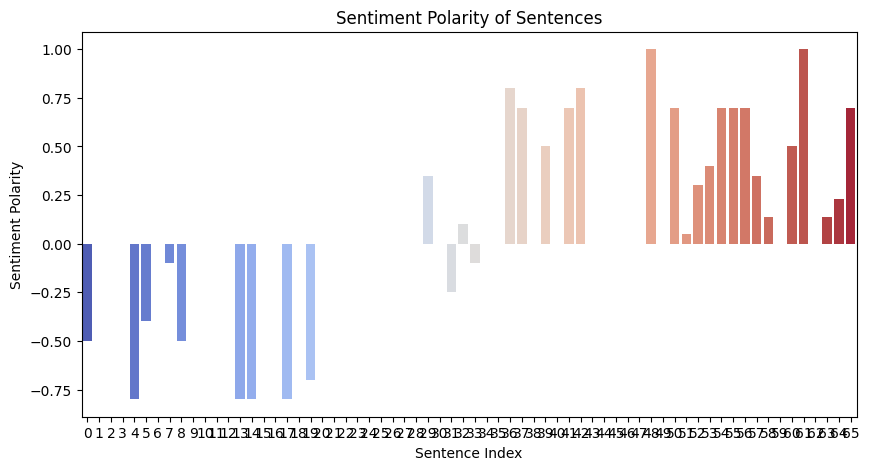

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the Sentiment Polarity
plt.figure(figsize=(10, 5))
sns.barplot(x=data.index, y=data['Sentiment_Polarity'], palette='coolwarm')
plt.title('Sentiment Polarity of Sentences')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment Polarity')
plt.show()


<ipython-input-7-f21604e8e7cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data['Sentiment_Subjectivity'], palette='coolwarm')


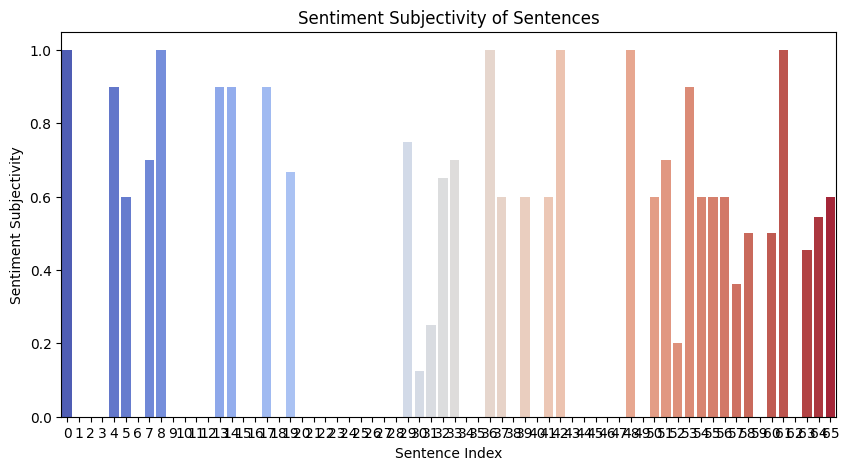

In [7]:
# Plotting the Sentiment Subjectivity
plt.figure(figsize=(10, 5))
sns.barplot(x=data.index, y=data['Sentiment_Subjectivity'], palette='coolwarm')
plt.title('Sentiment Subjectivity of Sentences')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment Subjectivity')
plt.show()

Sentiment_Category
Neutral     50.000000
Positive    33.333333
Negative    16.666667
Name: proportion, dtype: float64


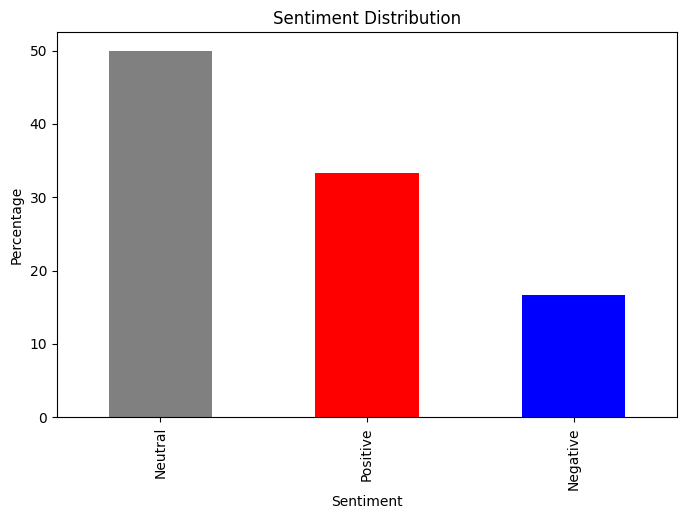

In [10]:
# Analyze sentiment for each sentence
data['Sentiment_Polarity'] = data['feelings'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize the sentiments
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment_Category'] = data['Sentiment_Polarity'].apply(categorize_sentiment)

# Calculate percentage of each sentiment category
sentiment_counts = data['Sentiment_Category'].value_counts(normalize=True) * 100

# Display the percentages
print(sentiment_counts)

# Plotting the Sentiment Distribution
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['grey', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()